In [1]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 
from scipy.stats import zscore

anomalous_datafile='test5.parquet'
normal_datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')

### Read parquet data files
anamalous_data=pd.read_parquet(anomalous_datafile)
normal_data=pd.read_parquet(normal_datafile)




PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58


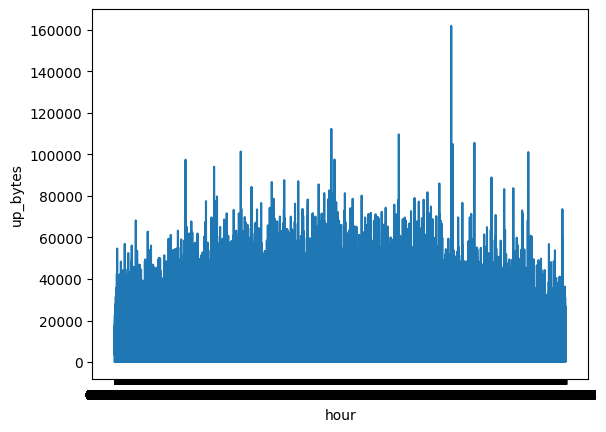

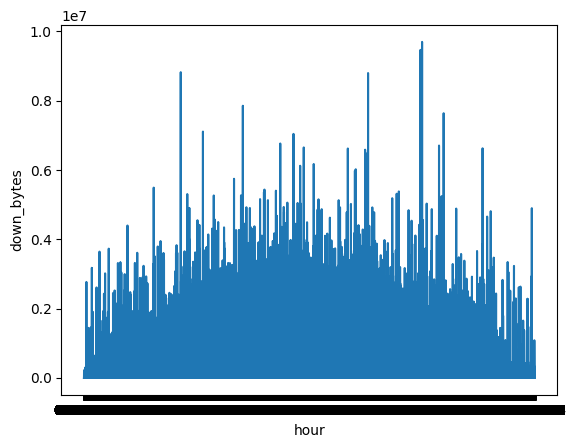

In [26]:
def timestamp_to_hour(timestamp):
    timestamp = timestamp/100
    hours, remainder = divmod(timestamp, 3600)
    minutes, seconds = divmod(remainder, 60)
    return "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

# insert a new column with the hour in normal_data
normal_data['hour'] = normal_data['timestamp'].apply(timestamp_to_hour)

plt.plot(normal_data['hour'], normal_data['up_bytes'])
plt.xlabel('hour')
plt.ylabel('up_bytes')
plt.show()

plt.plot(normal_data['hour'], normal_data['down_bytes'])
plt.xlabel('hour')
plt.ylabel('down_bytes')
plt.show()


5225541929
637957173


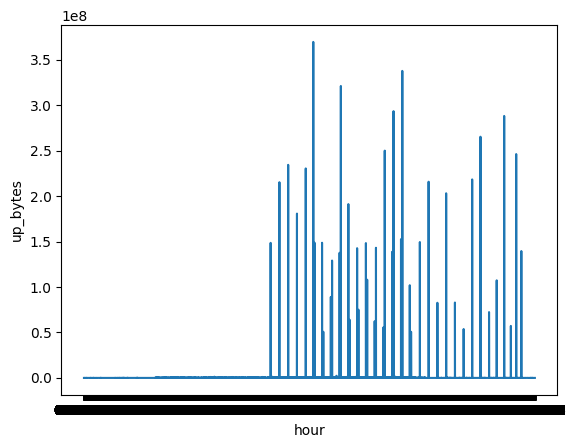

Text(0, 0.5, 'down_bytes')

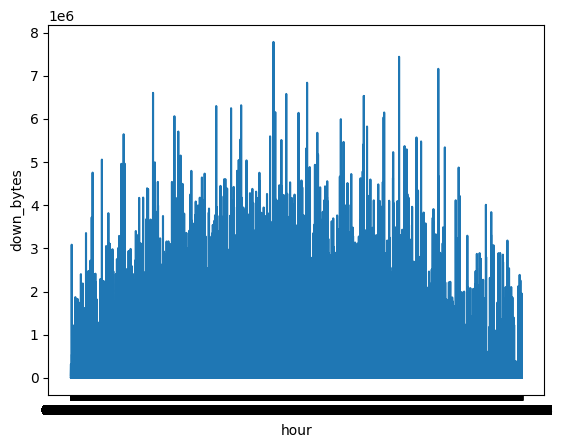

In [19]:
from scipy.stats import zscore

anamalous_data['zscore_up']=zscore(anamalous_data['up_bytes'])
anamalous_data['zscore_down']=zscore(anamalous_data['down_bytes'])

def timestamp_to_hour(timestamp):
    timestamp = timestamp/100
    hours, remainder = divmod(timestamp, 3600)
    minutes, seconds = divmod(remainder, 60)
    return "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

anamalous_data['hour']=anamalous_data['timestamp'].apply(lambda x: timestamp_to_hour(x))
# filter anomalous data to get only src_ip=192.168.105.20
anamalous_data_20=anamalous_data[anamalous_data['src_ip']=='192.168.105.20']

#sum all the lines of row 'up_bytes' of all day
sum = anamalous_data_20['up_bytes'].sum()
print(sum)

sum = anamalous_data_20['down_bytes'].sum()
print(sum)




# line graph with line of up_bytes in y axis and hour in x axis
plt.plot(anamalous_data['hour'], anamalous_data['up_bytes'])
plt.xlabel('hour')
plt.ylabel('up_bytes')
plt.show()

# line graph with line of down_bytes in y axis and hour in x axis
plt.plot(anamalous_data['hour'], anamalous_data['down_bytes'])
plt.xlabel('hour')
plt.ylabel('down_bytes')
plt.show()

In [ ]:
### Read parquet data files
anomalous_data=pd.read_parquet(anomalous_datafile)
normal_data=pd.read_parquet(normal_datafile)

normal = normal_data[['up_bytes','down_bytes']].describe()
anomal = anamalous_data[['up_bytes','down_bytes']].describe()

In [ ]:
# Para o método do desvio padrão
mean_up = normal_data['up_bytes'].mean()
std_up = normal_data['up_bytes'].std()
threshold_up = mean_up + 3*std_up

mean_down = normal_data['down_bytes'].mean()
std_down = normal_data['down_bytes'].std()
threshold_down = mean_down + 3*std_down

# Para o método IQR
Q1_up = normal_data['up_bytes'].quantile(0.25)
Q3_up = normal_data['up_bytes'].quantile(0.75)
IQR_up = Q3_up - Q1_up
lower_bound_up = Q1_up - 1.5*IQR_up
upper_bound_up = Q3_up + 1.5*IQR_up

Q1_down = normal_data['down_bytes'].quantile(0.25)
Q3_down = normal_data['down_bytes'].quantile(0.75)
IQR_down = Q3_down - Q1_down
lower_bound_down = Q1_down - 1.5*IQR_down
upper_bound_down = Q3_down + 1.5*IQR_down


In [ ]:
# Carregando o conjunto de dados de teste
test_data = pd.read_parquet('test5.parquet')

# Identificando anomalias
anomalies_up = test_data[(test_data['up_bytes'] > threshold_up) | (test_data['up_bytes'] < lower_bound_up) | (test_data['up_bytes'] > upper_bound_up)]
# in the table anomalies_up add the countries and organizations from source IP and destination IP
anomalies_up['dst_country'] = anomalies_up['dst_ip'].apply(lambda x: gi.country_code_by_addr(x))
anomalies_up['dst_org'] = anomalies_up['dst_ip'].apply(lambda x: gi2.org_by_addr(x))

anomalies_down = test_data[(test_data['down_bytes'] > threshold_down) | (test_data['down_bytes'] < lower_bound_down) | (test_data['down_bytes'] > upper_bound_down)]
# in the table anomalies_down add the countries and organizations from source IP and destination IP
anomalies_down['dst_country'] = anomalies_down['dst_ip'].apply(lambda x: gi.country_code_by_addr(x))
anomalies_down['dst_org'] = anomalies_down['dst_ip'].apply(lambda x: gi2.org_by_addr(x))



In [ ]:
# from all data, get the organization and country of the source IP and destination IP
test_data['dst_country'] = test_data['dst_ip'].apply(lambda x: gi.country_code_by_addr(x))
test_data['dst_org'] = test_data['dst_ip'].apply(lambda x: gi2.org_by_addr(x))


In [ ]:
# Get normal data with respective countries and organizations
# normal_data = test_data[(test_data['up_bytes'] < threshold_up) & (test_data['up_bytes'] > lower_bound_up) & (test_data['up_bytes'] < upper_bound_up) & (test_data['down_bytes'] < threshold_down) & (test_data['down_bytes'] > lower_bound_down) & (test_data['down_bytes'] < upper_bound_down)]
normal_data['dst_country'] = normal_data['dst_ip'].apply(lambda x: gi.country_code_by_addr(x))
normal_data['dst_org'] = normal_data['dst_ip'].apply(lambda x: gi2.org_by_addr(x))

Hora do dia

In [ ]:
# From timestamp calculate the hour of the day knowing that the timestamp is related to the zero hour of the day
def timestamp_to_hour(timestamp):
    timestamp = timestamp/100
    hours, remainder = divmod(timestamp, 3600)
    minutes, seconds = divmod(remainder, 60)
    return "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

# Add a column to the table with the hour of the day
test_data['hour_of_day'] = test_data['timestamp'].apply(lambda x: timestamp_to_hour(x))
normal_data['hour_of_day'] = normal_data['timestamp'].apply(lambda x: timestamp_to_hour(x))


Detecção de Outliers Baseada em Z-Score

O z-score é uma medida estatística que descreve a posição de um valor único dentro de uma distribuição de valores. É calculado como a diferença entre um valor individual e a média do grupo, dividido pelo desvio padrão do grupo. Em outras palavras, o z-score é a quantidade de desvios padrão que um valor individual está da média do grupo.

A razão para usar o z-score na detecção de anomalias é que ele permite uma avaliação objetiva de quão "incomum" um valor individual é em relação ao restante do grupo. Valores com um z-score absoluto muito alto (por exemplo, maior que 3 ou menor que -3) são aqueles que estão significativamente distantes da média e, portanto, podem ser considerados anomalias ou outliers.

A vantagem de usar o z-score é que ele é uma medida padronizada que pode ser usada para comparar valores individuais entre grupos diferentes, mesmo quando os grupos têm médias e desvios padrão diferentes. Além disso, o z-score é útil quando a distribuição dos dados é aproximadamente normal, o que muitas vezes é o caso em muitos contextos práticos.

In [4]:
from scipy.stats import zscore

test_data = pd.read_parquet('test5.parquet')


# Calculando o z-score
test_data['zscore_up'] = zscore(test_data['up_bytes'])
test_data['zscore_down'] = zscore(test_data['down_bytes'])

# Calculando o z-score normalizado
test_data['zscore_up_norm'] = (test_data['up_bytes'] - test_data['up_bytes'].mean())/test_data['up_bytes'].std()
test_data['zscore_down_norm'] = (test_data['down_bytes'] - test_data['down_bytes'].mean())/test_data['down_bytes'].std()

# Save in a table the data with zscore > 3
exfiltração_up = test_data[test_data['zscore_up'].abs() > 3]
anomalies_down_zscore = test_data[test_data['zscore_down'].abs() > 3]
anomalies_down_zscore_tcp_only = test_data[(test_data['zscore_down'].abs() > 3) & (test_data['proto'] == 'tcp')]

botnet_ips_list = ['192.168.105.19', '192.168.105.88', '192.168.105.151', '192.168.105.172']

anomalies_down_zscore_without_botnet = anomalies_down_zscore[~anomalies_down_zscore['src_ip'].isin(botnet_ips_list)]








Bot Net Identification

In [15]:
# I need to detect a bootnet coordination between hosts inside the network
# From normal_data, get all lines where src_ip and dst_ip are '192.168.105.XX'
insiders=normal_data[(normal_data['src_ip'].str.startswith('192.168.105.')) & (normal_data['dst_ip'].str.startswith('192.168.105.'))]
# From insiders, extract unique dst_ip
servidores=insiders['dst_ip'].unique()
# add to servidores the number of times each dst_ip appears in the table insiders
servidores=pd.DataFrame(servidores,columns=['dst_ip'])
servidores['count']=insiders.groupby('dst_ip')['dst_ip'].count().values


insiders_anomal = anamalous_data[(anamalous_data['src_ip'].str.startswith('192.168.105.')) & (anamalous_data['dst_ip'].isin(servidores['dst_ip']))]
# count the number of times each src_ip appears in the table insiders_anomal
insiders_anomal['src_ip'].value_counts()
Comunicacao_DNS_Anomal = insiders_anomal['src_ip'].value_counts().reset_index()
Comunicacao_DNS_Anomal.columns = ['src_ip', 'count']


insiders_normal = normal_data[(normal_data['src_ip'].str.startswith('192.168.105.')) & (normal_data['dst_ip'].isin(servidores['dst_ip']))]
insiders_normal['src_ip'].value_counts()
Comunicacao_DNS_normal = insiders_normal['src_ip'].value_counts().reset_index()
Comunicacao_DNS_normal.columns = ['src_ip', 'count']
# insiders_anomal=pd.DataFrame(insiders_anomal['dst_ip'].unique(),columns=['dst_ip'])
# From insiders anomal, exclude all lines that are 192.168.105.222 192.168.105.223 192.168.105.229 192.168.105.230 192.168.105.240
excluded_ips=['192.168.105.222','192.168.105.223','192.168.105.225','192.168.105.229','192.168.105.230','192.168.105.238','192.168.105.240']
botnet_ips = insiders_anomal[~insiders_anomal['dst_ip'].isin(excluded_ips)]
# get all flows that has destination IP in botnet_ips
botnet_flows = anamalous_data[anamalous_data['dst_ip'].isin(botnet_ips['dst_ip'])]

In [5]:
# From anomalous_data, get all trafic from 192.168.105.19 192.168.105.88 192.168.105.151 192.168.105.172
botnet_trafic = anamalous_data[anamalous_data['src_ip'].isin(['192.168.105.19','192.168.105.88','192.168.105.151','192.168.105.172'])]
# botnet_trafic + organization and country of the source IP and destination IP
botnet_trafic['dst_country'] = botnet_trafic['dst_ip'].apply(lambda x: gi.country_code_by_addr(x))
botnet_trafic['dst_org'] = botnet_trafic['dst_ip'].apply(lambda x: gi2.org_by_addr(x))



/tmp/ipykernel_5311/3741722154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botnet_trafic['dst_country'] = botnet_trafic['dst_ip'].apply(lambda x: gi.country_code_by_addr(x))
/tmp/ipykernel_5311/3741722154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  botnet_trafic['dst_org'] = botnet_trafic['dst_ip'].apply(lambda x: gi2.org_by_addr(x))


Exfiltração